In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [18]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

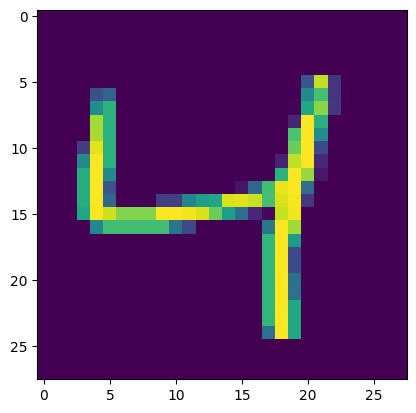

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9845 - loss: 0.0473 - val_accuracy: 0.9713 - val_loss: 0.1009
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9722 - val_loss: 0.0976
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9681 - val_loss: 0.1208
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9751 - val_loss: 0.0931
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9718 - val_loss: 0.1168
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9946 - loss: 0.0166 - val_accuracy: 0.9751 - val_loss: 0.1057
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9948 - loss: 0.0153 - val_accuracy: 0.9727 - val_loss: 0.1216
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9951 - loss: 0.0137 - 

In [29]:
y_prob = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [37]:
from sklearn.metrics import accuracy_score

y_prob = model.predict(X_test)
# Get predicted labels by selecting the index with the highest probability
y_pred = y_prob.argmax(axis=1)

accuracy_score(y_test, y_pred) # Now, y_pred is defined and can be used

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.9766

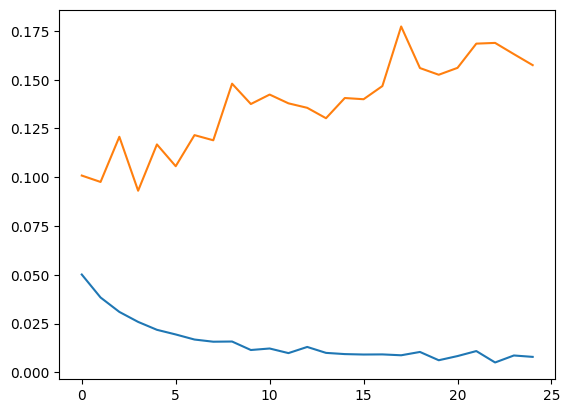

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

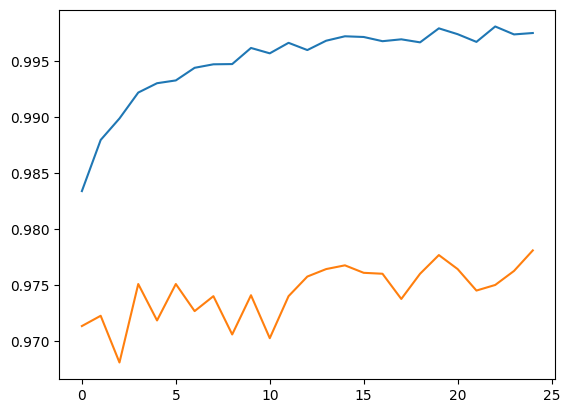

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

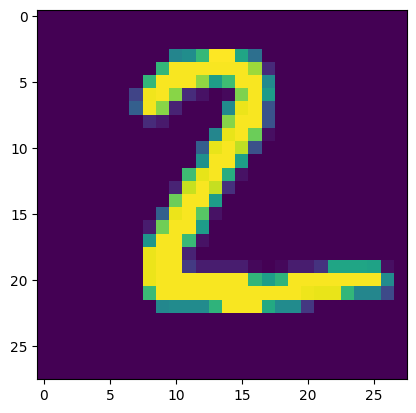

In [33]:
plt.imshow(X_test[1])

In [34]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([2])